In [ ]:
import pandas as pd
df=pd.read_excel("/content/drive/MyDrive/MLdataset.xlsx")

In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,f1_score, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV, train_test_split
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt

In [ ]:
df2.head(1500)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,170136.0,160296.36,0.00,0.00,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.00,0.00,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,181.0,0.00,0.00,0.00,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.00,0.00,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.00,0.00,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,6,PAYMENT,12889.32,152109.0,139219.68,0.00,0.00,0,0,0,0,0,1,0
1496,6,PAYMENT,4192.58,5989.0,1796.42,0.00,0.00,0,0,0,0,0,1,0
1497,6,TRANSFER,4792.35,5088.0,295.65,0.00,4792.35,0,0,0,0,0,0,1
1498,6,PAYMENT,20036.57,13279.0,0.00,0.00,0.00,0,0,0,0,0,1,0


In [ ]:
print(df.columns)

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')


In [ ]:
# Identify the columns in the DataFrame that contain numerical data
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64']]

# Get descriptive statistics for numerical data
num_desc = df[num_cols].describe ()
print(num_desc)

             amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
count  1.500000e+03   1.500000e+03    1.500000e+03    1.500000e+03   
mean   9.535012e+04   4.791397e+05    4.659506e+05    8.861349e+05   
std    4.233792e+05   1.646649e+06    1.633007e+06    2.754203e+06   
min    1.506000e+01   0.000000e+00    0.000000e+00    0.000000e+00   
25%    3.480237e+03   5.332500e+02    0.000000e+00    0.000000e+00   
50%    9.550065e+03   1.976250e+04    7.161580e+03    0.000000e+00   
75%    4.851320e+04   7.097762e+04    5.502636e+04    8.938065e+04   
max    1.000000e+07   1.290000e+07    1.250000e+07    1.830000e+07   

       newbalanceDest      isFraud  
count    1.500000e+03  1500.000000  
mean     1.001874e+06     0.034667  
std      2.950784e+06     0.182995  
min      0.000000e+00     0.000000  
25%      0.000000e+00     0.000000  
50%      0.000000e+00     0.000000  
75%      9.957201e+04     0.000000  
max      1.920000e+07     1.000000  


In [ ]:
# box plot
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
sns.set_style("darkgrid")

<Axes: xlabel='amount'>

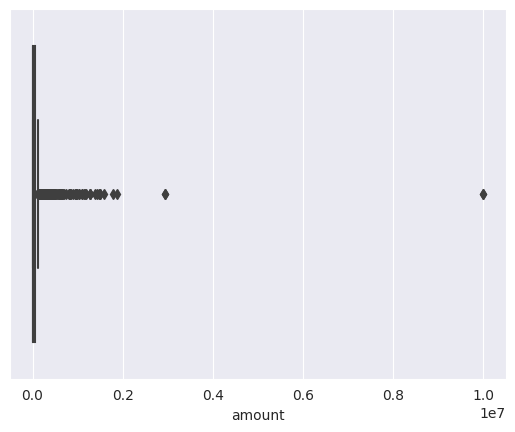

In [ ]:
sns.boxplot(x=df["amount"])

<Axes: xlabel='oldbalanceOrg'>

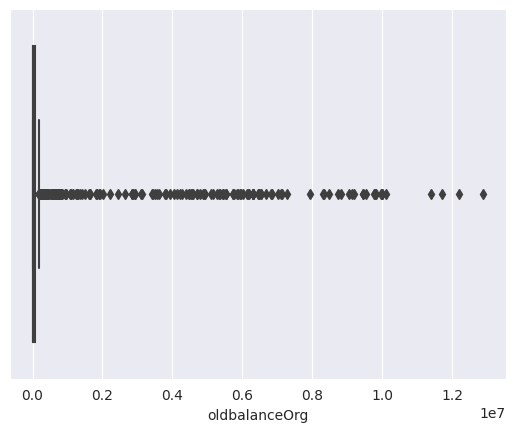

In [ ]:
sns.boxplot(x=df["oldbalanceOrg"])

<Axes: xlabel='newbalanceOrig'>

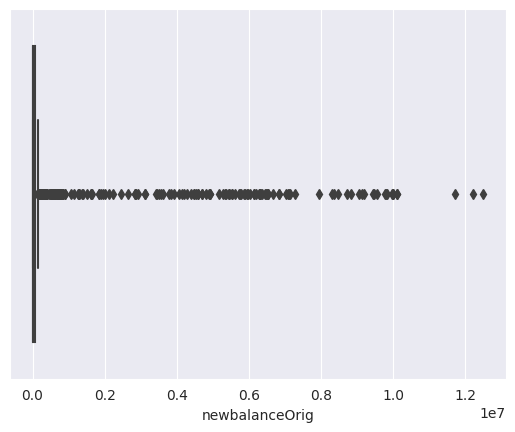

In [ ]:
sns.boxplot(x=df["newbalanceOrig"])

<Axes: xlabel='oldbalanceDest'>

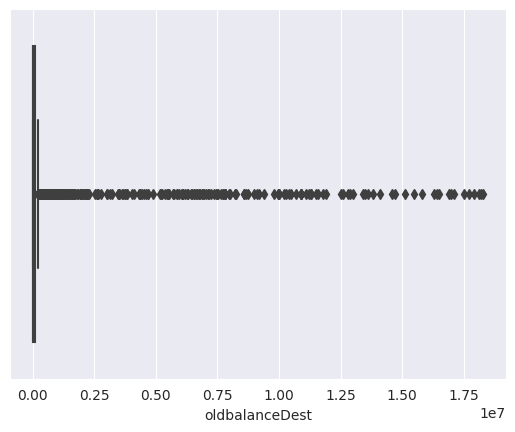

In [ ]:
sns.boxplot(x=df["oldbalanceDest"])


<Axes: xlabel='newbalanceDest'>

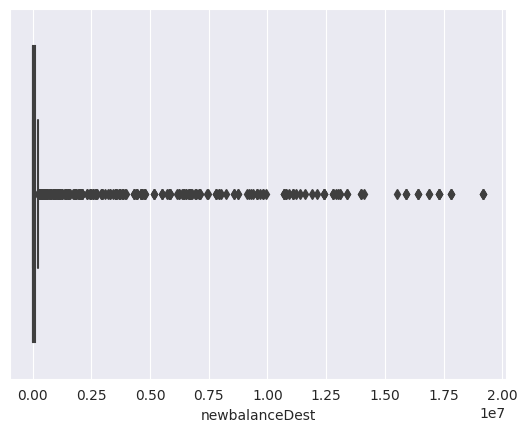

In [ ]:
sns.boxplot(x=df["newbalanceDest"])


In [ ]:
print(df2.groupby('type')['type'].size())

type
CASH_IN     136
CASH_OUT    212
DEBIT        72
PAYMENT     934
TRANSFER    146
Name: type, dtype: int64


In [ ]:
if 'type_CASH_IN' in df2.columns:
    print(df2['type_CASH_IN'].value_counts())
if 'type_CASH_OUT' in df2.columns:
    print(df2['type_CASH_OUT'].value_counts())
if 'type_DEBIT' in df2.columns:
    print(df2['type_DEBIT'].value_counts())
if 'type_PAYMENT' in df2.columns:
    print(df2['type_PAYMENT'].value_counts())
if 'type_TRANSFER' in df2.columns:
    print(df2['type_TRANSFER'].value_counts())

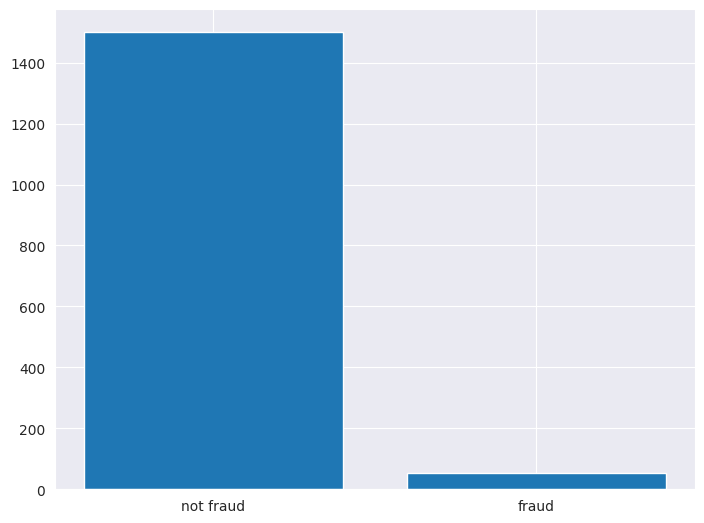

In [ ]:
#Fraud vs Not fraud
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
fraud = ['not fraud', 'fraud']
count = [1500,52]
ax.bar(fraud,count)
plt.show()

In [ ]:
X=df2.drop(columns=['isFraud'],axis=1)
y=df2['isFraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
# Separate features (X) and target (y)
X = df.drop(['isFraud'], axis=1)
y = df['isFraud']

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale data using StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [ ]:
# Convert target to integer data type
y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [ ]:
# Train the model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
#Define the random forest model and fit the RF model on the train data

models = {}

models['Random_Forest'] = RandomForestClassifier(n_estimators=10)
models['Logistic_Regression'] = LogisticRegression()

In [ ]:
accuracy, precision, recall, f1 = {}, {}, {}, {},

for key in models.keys():
    models[key].fit(X_train, y_train)
    pred = models[key].predict(X_test)
    
    accuracy[key] = accuracy_score(pred, y_test)
    precision[key] = precision_score(pred, y_test)
    recall[key] = recall_score(pred, y_test)
    f1[key] = f1_score(pred, y_test)

In [ ]:
#Evaluate the models
df_model = pd.DataFrame(index=models.keys(), columns=['Accuracy', 'Precision', 'Recall', 'F1'])

df_model['Accuracy'] = accuracy.values()
df_model['Precision'] = precision.values()
df_model['Recall'] = recall.values()
df_model['F1'] = f1.values()

df_model

,Accuracy,Precision,Recall,F1
Random_Forest,0.996667,0.833333,1.0,0.909091
Logistic_Regression,0.983333,0.166667,1.0,0.285714


In [ ]:
accuracy = accuracy_score(y_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [ ]:
# RF model fit with OOB
rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [ ]:
# Evaluate OOB score for randomforest classifier
oob_score = rf.oob_score_
print("OOB score:", oob_score)

OOB score: 0.9908333333333333


In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [ ]:
# Create logistic regression model
logreg = LogisticRegression()

In [ ]:
# Define k-fold cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5)

In [ ]:
# Evaluate model using cross-validation
cv_scores = cross_val_score(logreg, X_train, y_train, cv=cv_strategy)

In [ ]:
# Print average cross-validation score
print("Average Cross-validation score: {:.2f}".format(cv_scores.mean()))

Average Cross-validation score: 0.97


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

In [ ]:
# Define the hyperparameters and their ranges
param_dist = {'n_estimators': np.arange(50, 1000, 50),
              'max_depth': np.arange(5, 50, 5),
              'min_samples_split': np.arange(2, 10),
              'min_samples_leaf': np.arange(1, 10),
              'max_features': ['sqrt', 'log2']}

In [ ]:
# Define the model and search
rf_model = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)

In [ ]:
# Fit the search to the training data
rf_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45]),
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])},
                   random_state=42)

In [ ]:
# Print the best hyperparameters and the best score
print("Best Hyperparameters:", rf_search.best_params_)
print("Best Score:", rf_search.best_score_)

Best Hyperparameters: {'n_estimators': 350, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_features': 'log2', 'max_depth': 30}
Best Score: 0.9875


In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best hyperparameters:", best_params)
print("Best score:", best_score)

Best hyperparameters: {'n_estimators': 20}
Best score: 0.9891666666666667


In [ ]:
# Define the scoring metric
scoring = {'Accuracy': 'Precision', 'Recall': 'F1'}
print(scoring)

{'Accuracy': 'Precision', 'Recall': 'F1'}


<Axes: >

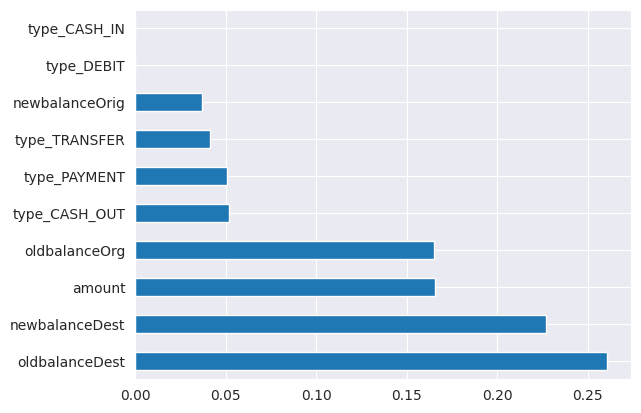

In [ ]:
feat_importances = pd.Series(models['Random_Forest'].feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')